In [1]:

import ffmpeg
import cv2
import numpy as np
import os
from numpy.linalg import svd, inv
from matplotlib import pyplot as plt
from ArucoDetector import *
from pprint import pprint

In [2]:
# random calibration data
imsize = (1920, 1080)
# K = cv.getDefaultNewCameraMatrix(
    # np.diag([1920, 1920, 1]), imsize, True)
K = np.array([[1867, 0, 960], [0, 1575, 540], [0, 0, 1]])
print(K)
arDetector = ArUcoDetector(imsize, K)

[[1867    0  960]
 [   0 1575  540]
 [   0    0    1]]


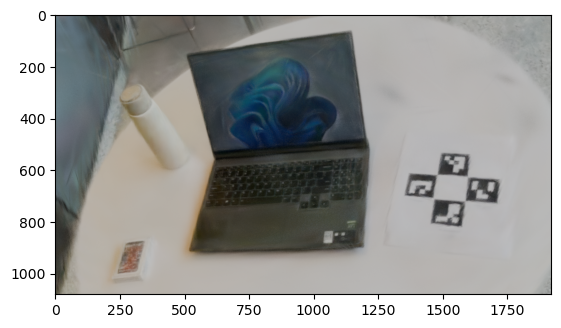

In [3]:
frame = cv2.imread("images/detected_marker_3.png")
# frame = cv2.imread("images/DICT_4X4_250_id_0123.png")
fig = plt.figure()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [4]:
# detect the marker
corners, ids, rejected = arDetector.detector.detectMarkers(frame)
print(ids.ravel())
pprint(corners)

[3 1]
(array([[[1600.,  632.],
        [1718.,  637.],
        [1712.,  730.],
        [1591.,  721.]]], dtype=float32),
 array([[[1373.,  614.],
        [1478.,  623.],
        [1463.,  707.],
        [1353.,  699.]]], dtype=float32))


In [ ]:
plt.figure(figsize=(15,15))
cv.aruco.drawDetectedMarkers(frame, corners, ids)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
# sort the corners by id
id_argsort = np.argsort(ids.ravel())
id_sorted = ids.ravel()[id_argsort]
corners_sorted = [corners[i] for i in id_argsort]

print(id_sorted)
pprint(corners_sorted)

[1 3]
[array([[[1373.,  614.],
        [1478.,  623.],
        [1463.,  707.],
        [1353.,  699.]]], dtype=float32),
 array([[[1600.,  632.],
        [1718.,  637.],
        [1712.,  730.],
        [1591.,  721.]]], dtype=float32)]


In [7]:

params = cv.aruco.EstimateParameters()
params.pattern = cv.aruco.ARUCO_CCW_CENTER

rvecs, tvecs = cv.aruco.estimatePoseSingleMarkers(
    corners_sorted, 6, K, None, None, None, None, params)[:2]

print("tvecs:")
pprint(tvecs.reshape(-1, 3))

print("rvecs: (deg)")
pprint(rvecs.reshape(-1, 3) / np.pi * 180)

tvecs:
array([[ 25.72640444,   6.78784234, 108.13516509],
       [ 37.05378237,   7.44602462, 102.34643451]])
rvecs: (deg)
array([[137.28210439,  14.49207639, -27.58992302],
       [137.99428332,  12.60556412, -27.59534536]])


In [8]:
# convert the rotation vector to rotation matrix
print(rvecs[0][0])

rvecs_mat = cv.Rodrigues(rvecs[0][0])
print("rvecs_mat:")
pprint(rvecs_mat)

[ 2.39602473  0.25293445 -0.481535  ]
rvecs_mat:
(array([[ 0.91302676,  0.30209535, -0.27408127],
       [ 0.05422509, -0.75586129, -0.65248246],
       [-0.40427934,  0.58087186, -0.70650273]]),
 array([[ 0.03881785, -0.20240726, -0.09378444,  0.1920877 , -0.62507124,
         0.74007066,  0.11343075, -0.70810946, -0.64710092],
       [-0.1446154 ,  0.67515675,  0.26241847,  0.7168013 ,  0.08272803,
        -0.03626503, -0.23045727, -0.24348021, -0.0683107 ],
       [ 0.27531788, -0.20175321,  0.69477162,  0.23371441,  0.12562211,
        -0.12610255,  0.65312707,  0.26839241, -0.15306973]]))


In [9]:
offset = np.mean(tvecs.reshape(-1, 3), axis=0)
# offset[0] *= -1
pprint(offset)

array([ 31.3900934 ,   7.11693348, 105.2407998 ])
